In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [3]:
import Nio
import glob

In [4]:
import netCDF4
ds_Y =[]
for iy in np.arange(1979, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/('+
           np.str(iy)+
          ')/VALUES/time/(Jun-Aug)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/')
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_allpr = xr.concat(ds_Y, dim='time')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [5]:
ds_allpr.time[70:100]

<xarray.DataArray 'time' (time: 30)>
array(['1979-08-10T12:00:00.000000000', '1979-08-11T12:00:00.000000000',
       '1979-08-12T12:00:00.000000000', '1979-08-13T12:00:00.000000000',
       '1979-08-14T12:00:00.000000000', '1979-08-15T12:00:00.000000000',
       '1979-08-16T12:00:00.000000000', '1979-08-17T12:00:00.000000000',
       '1979-08-18T12:00:00.000000000', '1979-08-19T12:00:00.000000000',
       '1979-08-20T12:00:00.000000000', '1979-08-21T12:00:00.000000000',
       '1979-08-22T12:00:00.000000000', '1979-08-23T12:00:00.000000000',
       '1979-08-24T12:00:00.000000000', '1979-08-25T12:00:00.000000000',
       '1979-08-26T12:00:00.000000000', '1979-08-27T12:00:00.000000000',
       '1979-08-28T12:00:00.000000000', '1979-08-29T12:00:00.000000000',
       '1979-08-30T12:00:00.000000000', '1979-08-31T12:00:00.000000000',
       '1980-06-01T12:00:00.000000000', '1980-06-02T12:00:00.000000000',
       '1980-06-03T12:00:00.000000000', '1980-06-04T12:00:00.000000000',
       '1980-0

In [6]:
ds_Y =[]
for iy in np.arange(1979, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.air2m/time/('+
           np.str(iy)+
          ')/VALUES/time/(Jun-Aug)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/')
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_allTemp = xr.concat(ds_Y, dim='time')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [7]:
ds_Y =[]
for iy in np.arange(1979, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.dpt2m/time/('+
           np.str(iy)+
          ')/VALUES/time/(Jun-Aug)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/')
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_allDewTemp = xr.concat(ds_Y, dim='time')


1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [8]:
ds_allpr.merge(ds_allTemp, inplace=True)
ds_allpr.merge(ds_allDewTemp, inplace=True)

<xarray.Dataset>
Dimensions:  (lat: 11, lon: 14, time: 3496)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * time     (time) datetime64[ns] 1979-06-01T12:00:00 ... 2016-08-31T12:00:00
Data variables:
    apcp     (time, lat, lon) float32 4.7027545 4.224271 ... 0.00903541
    air2m    (time, lat, lon) float32 295.90994 295.5637 ... 295.2451 295.78067
    dpt2m    (time, lat, lon) float32 288.83118 289.37607 ... 291.32556
Attributes:
    Conventions:  IRIDL

In [9]:
week1 = ds_allpr.stack(MSll=('lat','lon','time'))


In [10]:
week1

<xarray.Dataset>
Dimensions:  (MSll: 538384)
Coordinates:
  * MSll     (MSll) MultiIndex
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 ... 257.0 257.0 257.0 257.0
  - time     (MSll) datetime64[ns] 1979-06-01T12:00:00 ... 1979-06-30T12:00:00
Data variables:
    apcp     (MSll) float32 4.7027545 0.27859205 ... 1.6738281 0.00903541
    air2m    (MSll) float32 295.90994 292.38757 ... 299.18417 295.78067
    dpt2m    (MSll) float32 288.83118 287.31357 ... 294.87686 291.32556
Attributes:
    Conventions:  IRIDL

In [11]:
week1.coords['MSll'] = np.arange(0,538384) 

In [12]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.air2m)


In [13]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["dpt2mb"] = to_bin(week1.dpt2m)


In [14]:
week1

<xarray.Dataset>
Dimensions:  (MSll: 538384)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 5 ... 538379 538380 538381 538382 538383
Data variables:
    apcp     (MSll) float32 4.7027545 0.27859205 ... 1.6738281 0.00903541
    air2m    (MSll) float32 295.90994 292.38757 ... 299.18417 295.78067
    dpt2m    (MSll) float32 288.83118 287.31357 ... 294.87686 291.32556
    tasb     (MSll) float32 296.0 292.0 294.0 298.0 ... 300.0 298.0 300.0 296.0
    dpt2mb   (MSll) float32 288.0 288.0 288.0 288.0 ... 294.0 296.0 294.0 292.0
Attributes:
    Conventions:  IRIDL

In [19]:
grouped1 = week1[['apcp','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.apcp.shape)
    if gp.apcp.shape[0]>500:
        
        var = np.nanpercentile(gp.apcp.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group

0 (8,)
1 (39,)
2 (243,)
3 (1122,)
4 (3108,)
5 (8118,)
6 (17783,)
7 (33604,)
8 (56488,)
9 (88143,)
10 (124756,)
11 (117856,)
12 (60728,)
13 (21074,)
14 (4918,)
15 (396,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 16)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 ... 306.0 308.0 310.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    apcp       (tasb) float64 2.081 2.335 4.17 5.376 ... 4.706 2.383 0.6673
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 0.8311 ... 3.493 2.129 0.0

Text(0, 0.5, '$lnI$')

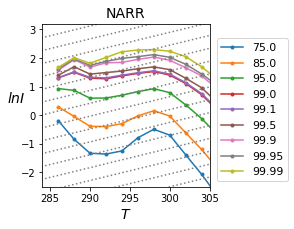

In [41]:
plt.figure(figsize=(3,3))
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'.-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.45):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
plt.title('NARR', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((284,305))
plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

In [42]:
grouped1 = week1[['apcp','dpt2mb']].groupby('dpt2mb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','dpt2mb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.dpt2mb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.apcp.shape)
    if gp.apcp.shape[0]>500:
        var = np.nanpercentile(gp.apcp.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(dpt2mb=k)] = var

ds_group

0 (2,)
1 (6,)
2 (23,)
3 (42,)
4 (84,)
5 (141,)
6 (302,)
7 (651,)
8 (1457,)
9 (3268,)
10 (6927,)
11 (15065,)
12 (29883,)
13 (51458,)
14 (71641,)
15 (83281,)
16 (88533,)
17 (94295,)
18 (75932,)
19 (15189,)
20 (204,)


<xarray.Dataset>
Dimensions:    (dpt2mb: 21, quantiles: 9)
Coordinates:
  * dpt2mb     (dpt2mb) float64 260.0 262.0 264.0 266.0 ... 296.0 298.0 300.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    apcp       (dpt2mb) float64 0.0003222 0.0006567 0.002411 ... 13.93 7.406
    pr_q       (quantiles, dpt2mb) float64 0.0 0.0 0.0 0.0 ... 10.31 10.18 0.0

Text(0, 0.5, '$lnI$')

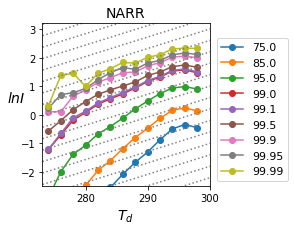

In [47]:
plt.figure(figsize=(3,3))
plt.plot(ds_group.dpt2mb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.4):
    plt.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
plt.title('NARR', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((273,300))
plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T_d$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

In [171]:

# from dask.distributed import Client, progress
# # HPC
# # client = Client(scheduler_file='/glade/scratch/jhamman/scheduler.json')
# # client

# from dask_kubernetes import KubeCluster
# cluster = KubeCluster(n_workers=20)
# cluster

ImportError: No module named dask_kubernetes

In [201]:
qqq = grouped1.reduce(np.nanpercentile, dim='MSll', q=0.65)

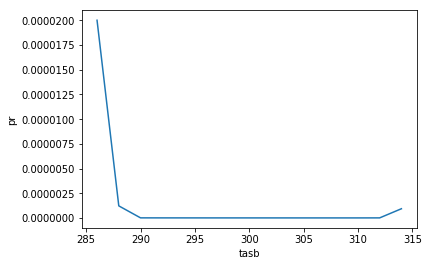

In [202]:
qqq.pr.plot()

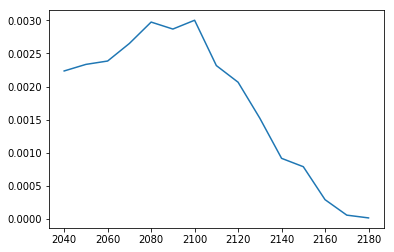

In [147]:
plt.plot(qqq.tasb.values, grouped1.max().pr.values)#